##### usage of yolo real time using Torch hub

In [1]:
import cv2
import torch
from PIL import Image
import cv2
import torch
from PIL import Image
import glob
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.image as mpimg
import os
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import cv2
import glob
from tqdm import tqdm
from barcode import EAN13
from barcode.writer import ImageWriter
import matplotlib.pyplot as plt

import cv2
import torch
from PIL import Image


%matplotlib inline


# Define necessary functions

# 1. Magnifying image shape
def scaleTuple(xxx, factor):
    a = list(xxx)
    b = [i * factor for i in a]
    #c = tuple(b)

    return (b[0],b[1])

#2. Add 2 different tuple
def tupleAddition(tuple1, tuple2):
    a = list(tuple1)
    b = list(tuple2)
    c = []
    for ai,bi in zip(a,b):
        c.append(ai+bi)

    return tuple(c)

#3. Convert float to integer
def FloatToInt (floatOrDecimal):
    lower = int(floatOrDecimal)
    upper = lower+1

    upperDifference = upper - floatOrDecimal
    lowerDifference  = floatOrDecimal - lower

    finalScore = 0

    if (upperDifference <= lowerDifference):
        finalScore = upper
    elif (upperDifference > lowerDifference):
        finalScore = lower

    return finalScore

#4. Zoom image
def zoom(label, zoom_factor=1):
    label.magnificationFactor = zoom_factor
    label.magnifiedImage = cv2.resize(np.copy(label.labelImage), None, fx=zoom_factor, fy=zoom_factor)
    #return image

#5. Binarize image : get white and black only 
def binarizeImage (image, tresh_value = 45):
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, tresh_value, 255, cv2.THRESH_BINARY)
    #plt.imshow(blackAndWhiteImage)
    return blackAndWhiteImage

#6. decode the barcode
def readBarcode (labelObject): 
    barcodes = decode(labelObject.binarizedImage)
    
    if (len(barcodes) > 0):
        print ('Barcode detected')
        
        k = 0
        for barcode in tqdm(barcodes):
            (x, y, w, h) = barcode.rect
        #cv2.rectangle(originalImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
            barcodeData = barcode.data.decode("utf-8")
            barcodeType = barcode.type
            barcode_object = Barcode(barcodeData, barcodeType, [(x, y), (x + w, y + h)], labelObject.boundPoints[0])
        
            labelObject.barcodeList.append(barcode_object)
        
            #list_locationPoints.append(((x, y), (x + w, y + h)))
        
            #list_barcodeData.append(barcodeData)
        
            #list_barcodeType.append(barcodeType)
            
            text = "{} ({})".format(barcodeData, barcodeType)
        
            #text = "{}".format(barcodeData)
            bbObject = BoundingBox((x, y), (x + w, y + h), text)
        
            labelObject.barcodeList[k].boundingBox = bbObject
        
            cv2.putText(labelObject.magnifiedImage, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            k +=1

    else:
        print ('Barcode not detected')
    

## Objects:
#1. Label
class Label:
    def __init__(self,  boundPoints = None, labelImage = None, originCoordinate = None):
        self.boundPoints = boundPoints
        self.labelImage = labelImage
        self.originCoordinate = originCoordinate
        self.barcodeReadStatus = False
    
        #magnified 
        self.magnifiedImage = None
        self.magnificationFactor = 1
        
        #binarized image
        self.binarizedImage = None

        #decoded barcode
        self.barcodeList = []
        
        #bounding box
        self.boundingBox = None
        
# 2. Barcodes
class Barcode:
    def __init__(self,  barcodeContent, barcodeType, fakeCoordinate, originAddress):
        self.barcodeContent = barcodeContent
        self.barcodeType = barcodeType
        self.fakeCoordinate = fakeCoordinate
        self.realCoordinate = []
        self.originAddress = originAddress
        self.boundingBox = None
        self.magnificationFactor = 1

#3. Bounding box
class BoundingBox:
     def __init__(self, initPosition, finalPosition, theText):
         self.initPosition = initPosition
         self.finalPosition = finalPosition
         self.theText = theText
         self.color = (0,0,255)

#### files and model loading

0
1


Using cache found in C:\Users\Quadrep/.cache\torch\hub\ultralytics_yolov5_master
Fusing layers... 
C:\Users\Quadrep\miniconda3\envs\yolov5\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
Adding AutoShape... 
YOLOv5  2021-6-27 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576.0MB)



<class 'models.common.AutoShape'>


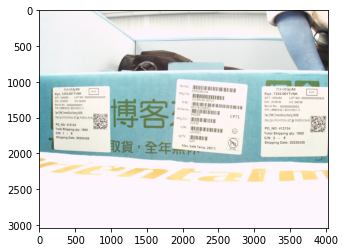

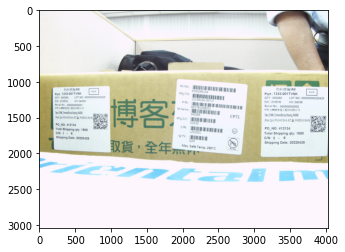

In [2]:
files = glob.glob('./data_camera//*.png')
print(len(files))

another_files = glob.glob('./data_camera/*.jpg')



for file in another_files:
    files.append(file)
    
    
print(len(files))

#print(len(files))
#files

model = torch.hub.load('ultralytics/yolov5', 'custom', path='./weights/barcode/exp3/weights/best.pt')
model.iou = 0.1
print(type(model))


%matplotlib inline
plt.imshow(cv2.imread(files[0])[:,:,::-1])


img2 = cv2.imread(files[0])
#img2.shape
test_image = img2[:,:,::-1]
plt.imshow(img2)
plt.show()
plt.imshow(test_image)
plt.show()

img2 = cv2.imread(files[0])  # OpenCV image (BGR tofiles[0] RGB)
imgs = [ img2]  # batch of images

for i in range (len(imgs)):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    
results = model(np.copy(img2))  # includes NMS, #using npcopy

#### using the model to get individual sticker

image 1/1: 3040x4032 3 items
Speed: 4.0ms pre-process, 869.0ms inference, 4.0ms NMS per image at shape (1, 3, 512, 640)
Saved image0.jpg to runs\hub\exp79
3
          xmin         ymin         xmax         ymax  confidence  class  name
0  1855.349976   960.874939  2929.499756  2016.124878    0.871582      0  item
1  3066.524902  1044.349976  4000.499756  2080.699951    0.803223      0  item
2   137.024994  1030.174927  1067.062500  2005.099854    0.768066      0  item
labels found
3
[[(1855, 960), (2929, 960), (1855, 2016), (2929, 2016)], [(3066, 1044), (4000, 1044), (3066, 2080), (4000, 2080)], [(137, 1030), (1067, 1030), (137, 2005), (1067, 2005)]]


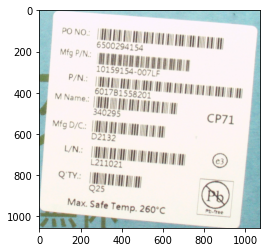

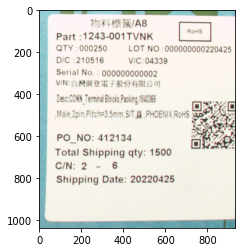

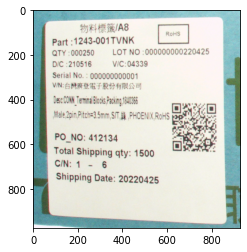

In [3]:
results.print()  
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
df = results.pandas().xyxy[0]

#img2 = cv2.imread(files[4])  # OpenCV image (BGR tofiles[0] RGB)
#imgs = [ img2]  # batch of images

df = results.pandas().xyxy[0]
print(len(df))
print(df)

bounding_box_list = []
stickers_list = []
image = np.copy(imgs[0])

if (len(df) >0):
    print('labels found')
    
    for i in range(len(df)):
        xmin = int(df.iloc[i].xmin)
        ymin = int(df.iloc[i].ymin)
        xmax = int(df.iloc[i].xmax)
        ymax = int(df.iloc[i].ymax)
        
        bbox = [(xmin, ymin),(xmax, ymin), (xmin, ymax), (xmax, ymax)]                                                          
        bounding_box_list.append(bbox)
        
        #2. determining 
        stickers_list.append(Label(bbox,image[ymin:ymax,xmin:xmax], (xmin, ymin)))
            
        
else:
    print('no label found')
    
print(len(bounding_box_list))
print(bounding_box_list)


i = 0
for item in stickers_list:
    xmin = int(df.iloc[i].xmin)
    ymin = int(df.iloc[i].ymin)
    xmax = int(df.iloc[i].xmax)
    ymax = int(df.iloc[i].ymax)
    
    item.boundingBox = [(xmin, ymin), (xmax, ymax)] 
    i+=1


for item in stickers_list[0].boundingBox:
    scaleTuple(item,2)


for i in range(len(stickers_list)):
    plt.imshow(stickers_list[i].labelImage[:,:,::-1])
    plt.show()

### Barcode decoding of Individual stickers
- 1. Image enlarging, factor = 2-3
- 2. binarizing image
- 3. decoding barcode

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Barcode detected



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Barcode not detected
Barcode detected



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.87it/s]


result:


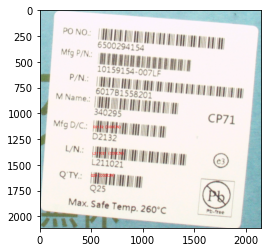

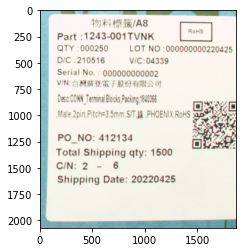

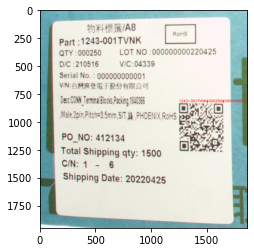

In [4]:
# enlarging image 3x
import cv2

for item in stickers_list:
    #item.magnificationFactor = 2
    #item.magnifiedImage = zoom(item.labelImage, item.magnificationFactor)
    zoom(item, 2)


#binarizing

for item in stickers_list:
    #item.binarizedImage = binarizeImage (item.magnifiedImage, 90)
    item.binarizedImage = binarizeImage (item.magnifiedImage, 180)

#cv2.imwrite('./test.jpg', stickers_list[0].binarizedImage)

# Read all barcode
for item in tqdm(stickers_list):
    readBarcode (item)

i = 0
print('result:')
for item in stickers_list:
    plt.imshow(item.magnifiedImage[:,:,::-1])
    plt.show()
    cv2.imwrite('test'+str(i)+'.jpg', item.magnifiedImage)
    i+=1